In [112]:
h5_input = "Scanpy_QC.dir/3dpi-kshv.hd5ad"
max_counts = 1000
min_genes = 300
min_cells= 10
n_neighbors=10
n_pcs=30
results_file = "test.h5ad"

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_h5ad(h5_input)

In [7]:
adata

AnnData object with n_obs × n_vars = 1907743 × 40496

In [17]:
sc.pp.filter_cells(adata, min_genes=min_genes)
sc.pp.filter_genes(adata, min_cells=min_cells)

In [21]:
adata

AnnData object with n_obs × n_vars = 7926 × 14548
    obs: 'n_genes'
    var: 'n_cells'

# Preprocess

Show genes that yield the highest fraction of counts in each single cell, across all cells

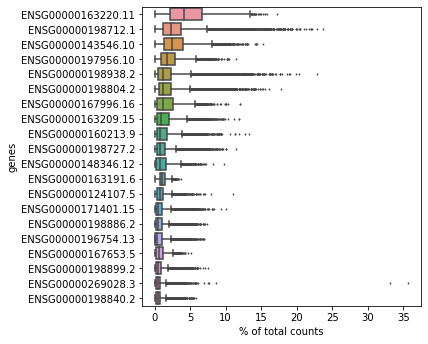

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [23]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

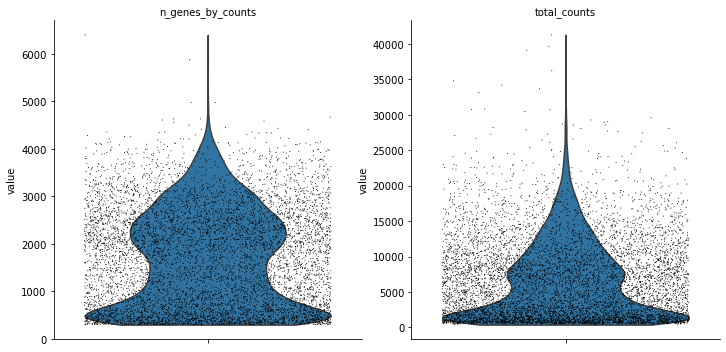

In [24]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

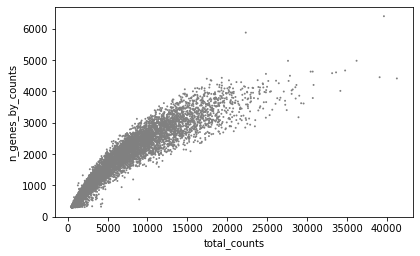

In [25]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [26]:
adata = adata[adata.obs.n_genes_by_counts < max_counts, :]

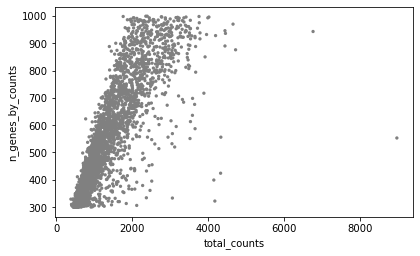

In [27]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Total count normalize the library

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/cgat/acribbs/miniconda3/envs/scflow/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [30]:
sc.pp.log1p(adata)

In [31]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

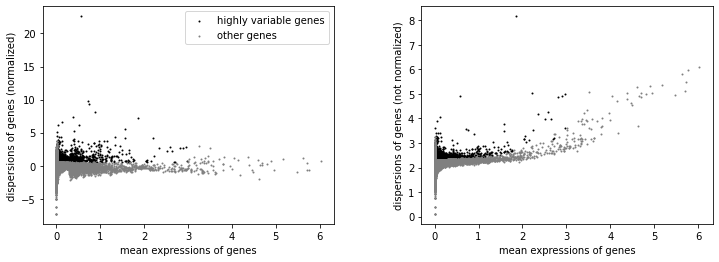

In [32]:
sc.pl.highly_variable_genes(adata)

In [33]:
adata.raw = adata

In [34]:
adata = adata[:, adata.var.highly_variable]

In [35]:
sc.pp.regress_out(adata, ['total_counts'])

In [36]:
sc.pp.scale(adata, max_value=10)

In [37]:
sc.tl.pca(adata, svd_solver='arpack')

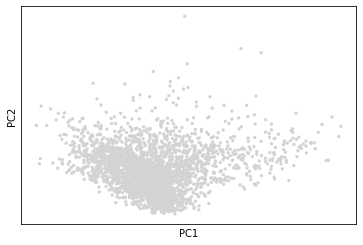

In [39]:
sc.pl.pca(adata)

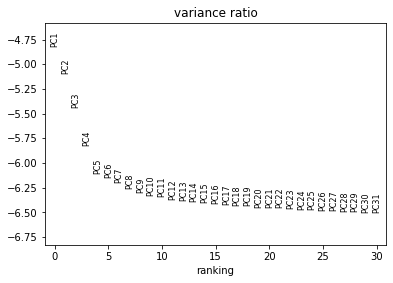

In [40]:
sc.pl.pca_variance_ratio(adata, log=True)

In [42]:
adata

AnnData object with n_obs × n_vars = 2729 × 3164
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [44]:
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)

In [48]:
sc.tl.umap(adata)

In [103]:
df = adata.var

df = df.sort_values(by=['mean_counts'], ascending=False)

genes = list(df.index)[0:3]

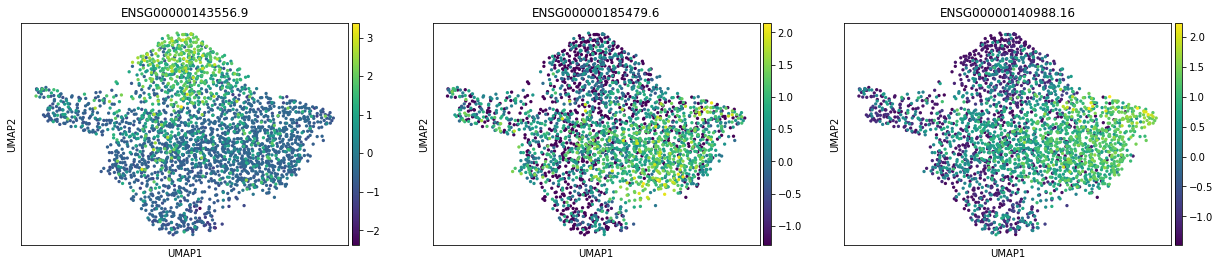

In [105]:
sc.pl.umap(adata, color=genes, use_raw=False)

In [107]:
sc.tl.leiden(adata)

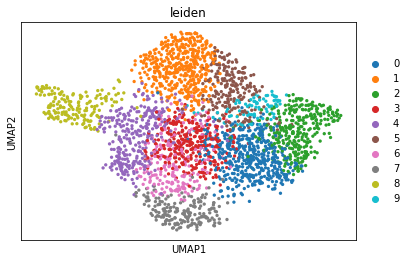

In [108]:
sc.pl.umap(adata, color=['leiden'])

Find marker genes

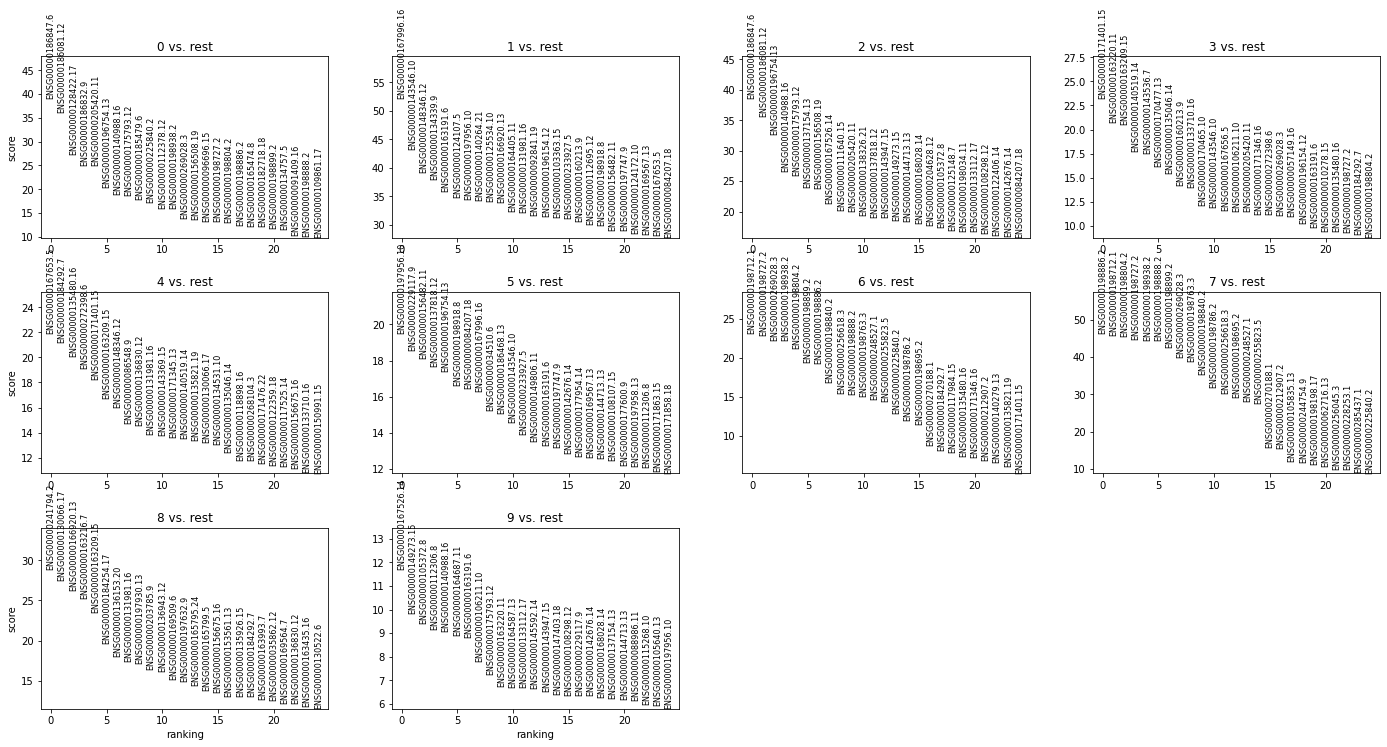

In [109]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [110]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:04)


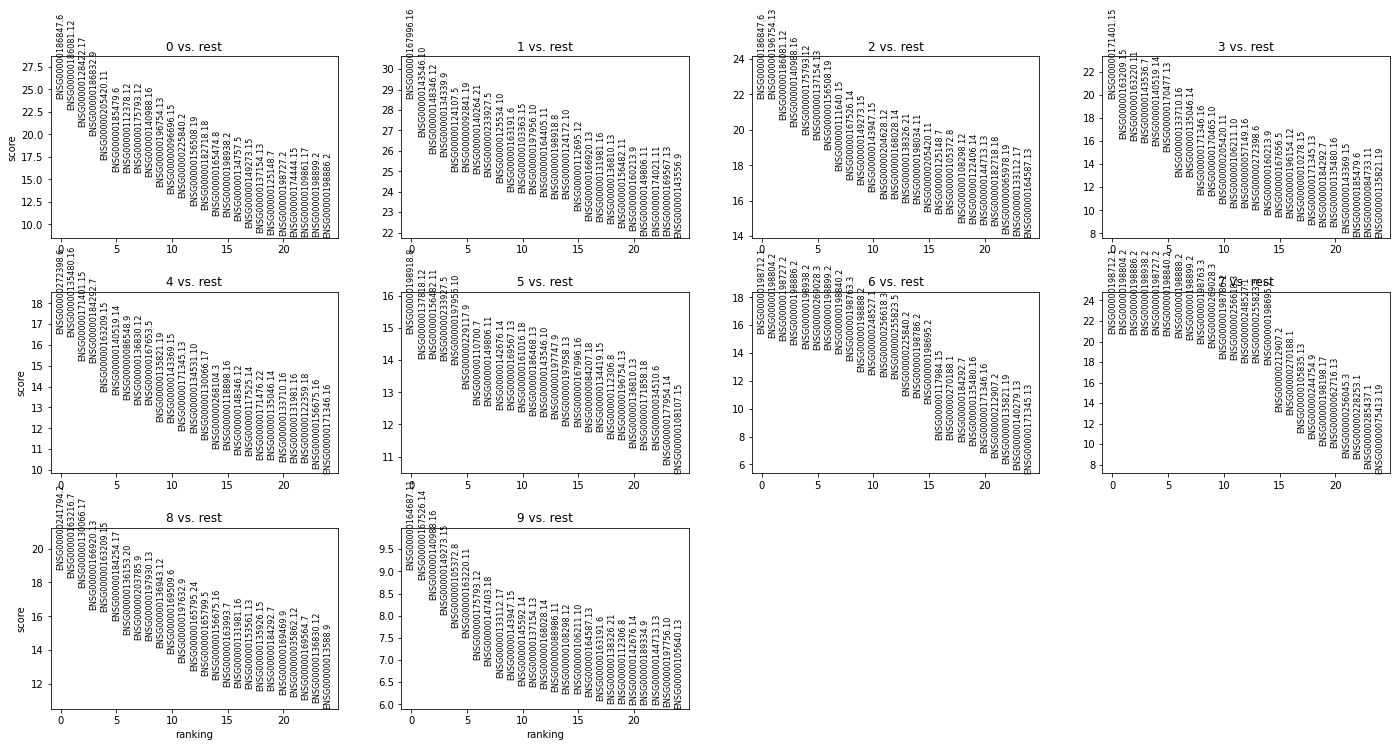

In [111]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [113]:
adata.write(results_file)